In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [3]:
W = 5
b = 3
variance = 2
epochs = 500
batch_size = 100

x_data = [np.random.randint(100) for i in range(10000)]
y_data = [i * W + b for i in x_data]

df = pd.DataFrame({'x': x_data, 'y': y_data})

In [4]:
df.head()

,x,y
0,55,278
1,57,288
2,90,453
3,67,338
4,72,363


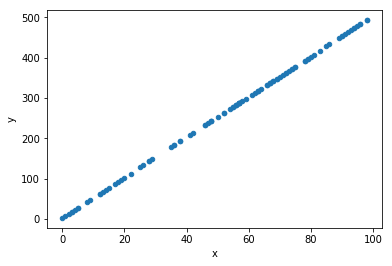

In [5]:
df.iloc[:100].plot('x', 'y', kind='scatter')

In [6]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
_W = tf.Variable(np.random.random(), dtype=tf.float32)
_b = tf.Variable(np.random.random(), dtype=tf.float32)

In [7]:
prediction = tf.add(tf.multiply(x, _W), _b)
loss = tf.losses.mean_squared_error(labels=y, predictions=prediction)
optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

In [8]:
losses = list()
weights = list()
biases = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for _ in range(epochs):
        
        currentBatch = 0
        while currentBatch <= len(x_data):
            batchX = x_data[currentBatch:currentBatch+batch_size]
            batchY = y_data[currentBatch:currentBatch+batch_size]
            currentBatch += batch_size
            
            sess.run([optimizer], feed_dict={x: batchX, y: batchY})
        
        __l, __w, __b = sess.run([loss, _W, _b], feed_dict={x: x_data, y: y_data})
        
        if _ % 100 == 0:
            print('Epoch {}'.format(_))
            print('Loss: {}'.format(__l))
            print('W: {}'.format(__w))
            print('b: {}'.format(__b))
            print('\n'*2)
            
        losses.append(__l)
        weights.append(__w)
        biases.append(__b)
        
    print('FINAL Epoch {}'.format(epochs))
    print('Loss: {}'.format(__l))
    print('W: {}'.format(__w))
    print('b: {}'.format(__b))
    print('\n'*2)

Epoch 0
Loss: 1.6372218132019043
W: 5.036586284637451
b: 0.45428693294525146



Epoch 100
Loss: 0.5996485948562622
W: 5.022141456604004
b: 1.4593517780303955



Epoch 200
Loss: 0.2196243703365326
W: 5.013400077819824
b: 2.0676088333129883



Epoch 300
Loss: 0.08044310659170151
W: 5.0081095695495605
b: 2.435718059539795



Epoch 400
Loss: 0.029461577534675598
W: 5.004908084869385
b: 2.6585025787353516



FINAL Epoch 500
Loss: 0.010900059714913368
W: 5.002985000610352
b: 2.7922890186309814





Text(0,0.5,'Loss')

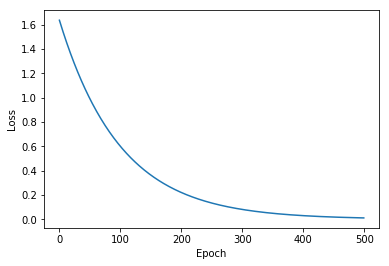

In [9]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0,0.5,'Weight')

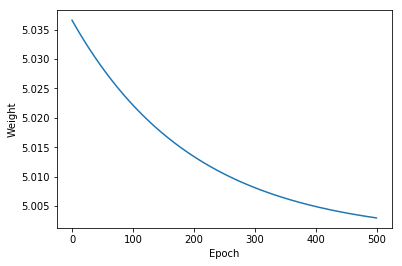

In [10]:
plt.plot(range(epochs), weights)
plt.xlabel('Epoch')
plt.ylabel('Weight')

Text(0,0.5,'Bias')

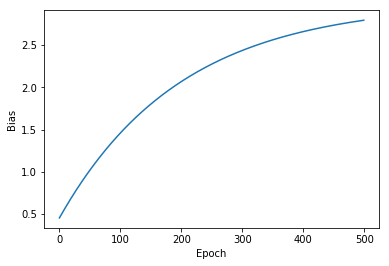

In [11]:
plt.plot(range(epochs), biases)
plt.xlabel('Epoch')
plt.ylabel('Bias')